In [1]:
### Import libraries

%load_ext autoreload
%autoreload 2
%matplotlib inline  

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"

import sys
import os
from __future__ import division
import numpy as np
import inspect
import pyparsing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pycog import Model, tasktools, RNN
from pycog.trialRNN import Trial

# Time
import datetime

# clear output
from IPython.display import clear_output
clear_output()

In [2]:
### ANALYSIS SAVE PATH

time = datetime.datetime.now()
datestr = time.isoformat()[0:10]

basePath = os.path.abspath('../')
if not sys.path.__contains__(basePath):
    sys.path.append(basePath)
basePath = basePath + '/'
dirPath = datestr + '_cb_3areas/' # all outputs and analyses will be saved here.
savePath = basePath + dirPath
savePathB = savePath + 'behavior/'
savePathN = savePath + 'neural/'
savePathP = savePath + 'psth/'
savePathC = savePath + 'cp/'
savePathD = savePath + 'dynamics/'

if not os.path.exists(savePath):
    os.makedirs(savePath)
    
if not os.path.exists(savePathB):
    os.makedirs(savePathB)
    
if not os.path.exists(savePathN):
    os.makedirs(savePathN)
    
if not os.path.exists(savePathP):
    os.makedirs(savePathP)    

if not os.path.exists(savePathC):
    os.makedirs(savePathC)    

if not os.path.exists(savePathD):
    os.makedirs(savePathD)   
    
### LOAD RNN PATH
rnnPath = basePath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
rnnName = '2020-04-10_cb_simple_3areas_seed=7.pkl'
rnnPath = rnnPath + rnnName

### ANALYSIS SCRIPT PATH -- this is for the script file so we can generate new trials to cross-validate, etc.
modelPath = basePath + 'examples/models/'
modelName = 'cb_analyze_fixed-cb.py' 
modelPath = modelPath + modelName

In [3]:
basePath

'/Users/michael/Documents/GitHub/multi-area-cleaned/'

In [7]:
from pycog.trialRNN import Dynamics 

# Define area partitions, which units are in area 1, 2, and 3.
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))
partition_pca = [idx1, idx2, idx3]

# Set noise levels
vin = 0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05**2

# Run RNN trials
dyn = Dynamics(rnnPath, modelPath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=100, seed=1, threshold=0.6, align='cb', partition_pca=partition_pca)

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 28/28: left_right: -1, cond: 108
The proportion of NaN RTs is 0.0
['dirs', 'cohs'] condition (-1, 67) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 78) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 90) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 108) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 124) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 135) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 147) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 158) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 180) did not have at least 1 trials, so it was discarded.
['dirs', 'cohs'] condition (-1, 2

/Users/michael/Documents/GitHub/multi-area-cleaned/pycog/trialRNN.py:1154: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(p_mtx, axis=0)


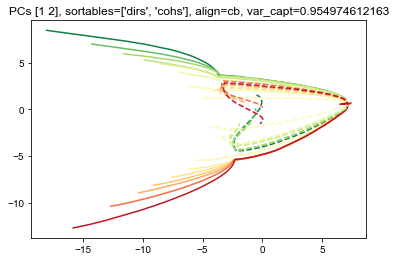

In [4]:
# Fig 7a - plot of PCs

dyn.plot_pcs_area(window=np.arange(185), is_x=True, partition_idx=0)
plt.savefig(savePathD + 'PCs.pdf')

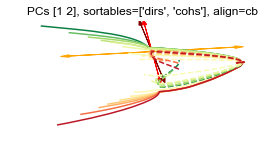

In [5]:
# Fig 7b - plot of PCs with dPCA axes

# load axes
dyn.dims = np.array((0,1))

dir_axis = np.load(basePath + 'testing/axes/' + 'ex_dir_axis_J.npy')
dir_axis = dir_axis.reshape(-1)
col_axis = np.load(basePath + 'testing/axes/' + 'ex_col_axis_J.npy')
col_axis = col_axis.reshape(-1)
ctx_axis = np.load(basePath + 'testing/axes/' + 'ex_ctx_axis_J.npy')
ctx_axis = ctx_axis.reshape(-1)

f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='targets1', f=f, scale=10, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='targets1', f=f, scale=6, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='targets1', f=f, scale=6, arrow_color='red')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'PCs+dPCs.pdf')

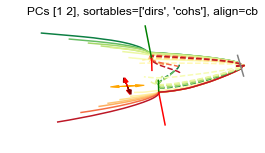

In [6]:
# Fig 7c - plot of PCs with inputs on

f = plt.figure(figsize=(4,2))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=4, start_loc='baseline')
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc2', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=4, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=4, start_loc='targets2', arrow_color='r')
ax = f.gca()
ax.axis('off')
f.savefig(savePathD + 'PCs+inputs.pdf')

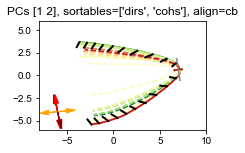

In [7]:
# Fig 7d - plot of targ onset with dynamics

f = plt.figure(figsize=(3,2))

x_sample = 1
y_sample = 1
xmin = 0
xmax = 0
ymin = 0
ymax = 0
scale = 1

dyn.partition_deltas(x_sample=x_sample, y_sample=y_sample, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
inputs = np.array((0,0,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(150), is_x=True)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(60,150,10, dtype='int'),
                                                    conds = [0,8], scale=scale * dyn.rnn.p['tau'])
# inputs scaled up to be visible
f = dyn.plot_input_pcs_area(inputs=[1,-1,0,0], f=f, is_x=True, scale=2*scale, start_loc='baseline')
f = dyn.plot_input_pcs_area(inputs=[-1,1,0,0], f=f, is_x=True, scale=2*scale, start_loc='baseline')
#                                                 xlim=[0,5], ylim=[0,5])
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc2', f=f, scale=scale, arrow_color='red')

ax = f.gca()
ax.set_xlim([-8, 10])
ax.set_ylim([-6,6])
plt.savefig(savePathD + 'PCs+targ-on-dynamics.pdf')


start loc is targets1


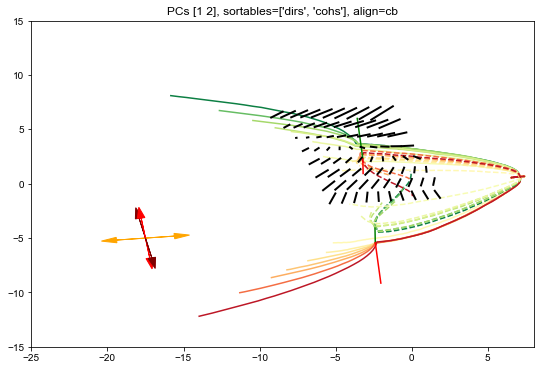

In [8]:
# Fig 7e - plot of local check on dynamics

scale = 1

#f = plt.figure(figsize=(3,2))

f = plt.figure(figsize=(9,6))

dyn.partition_deltas(x_sample=10, y_sample=8, xmin=-10, xmax=10, ymin=-5, ymax=5)
inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=scale*2, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
f = dyn.plot_local_dynamics_delta_area_x(f=f, inputs=inputs, t_sample=151, scale=scale*dyn.rnn.p['tau'])

ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'PCs+check-on-dynamics-local.pdf')

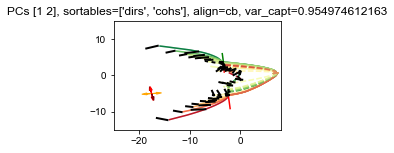

In [9]:
# Fig 7f - plot of check on dynamics along trajectories.
# Note, arrows were subsampled after generating this figure for visual clarity.

scale = 1

f = plt.figure(figsize=(3,2))

inputs = np.array((1,-1,0,0))
f = dyn.plot_pcs_area(f=f, window=np.arange(180), is_x=True)
f = dyn.plot_pcs_axis(axis=dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_pcs_axis(axis=-dir_axis, start_loc='Jloc', f=f, scale=1, arrow_color='orange')
f = dyn.plot_pcs_axis(axis=-col_axis, start_loc='Jloc', f=f, scale=1, arrow_color='maroon')
f = dyn.plot_pcs_axis(axis=-ctx_axis, start_loc='Jloc', f=f, scale=1, arrow_color='red')
f = dyn.plot_input_pcs_area(inputs=[1,-1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[1,-1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets1', arrow_color='r')
f = dyn.plot_input_pcs_area(inputs=[-1,1,-1,1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='g')
f = dyn.plot_input_pcs_area(inputs=[-1,1,1,-1], f=f, is_x=True, scale=scale*2, start_loc='targets2', arrow_color='r')
dyn.partition_deltas(x_sample=1, y_sample=1, xmin=0, xmax=0, ymin=0, ymax=0)
inputs = np.array((-1,1,0,0))
f = dyn.plot_pcs_area(f = f, window=np.arange(180), is_x=True, alpha=0.25)
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(7,13,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
    
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(14,20,3, dtype='int'), scale=scale*dyn.rnn.p['tau'])
                                                 #xlim=[-5,0], ylim=[-7.5,2.5])
inputs = np.array((1,-1,0,0))
f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(0,7,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])

f = dyn.plot_local_dynamics_delta_area_x_temporal(f=f,inputs=inputs, times=np.linspace(150,180,3, dtype='int'),
                                                    conds = np.linspace(21,27,7, dtype='int'), scale=scale*dyn.rnn.p['tau'])
ax = f.gca()
ax.set_xlim([-25, 8])
ax.set_ylim([-15, 15])

plt.savefig(savePathD + 'PCs+check-on-dynamics.pdf')